<div style="border-radius:10px; padding: 15px; background-color: #FFB3BA; font-size:115%; text-align:left">

<h3 align="center"><font color=Black>Capstone Project: Fraud Detection💲</font></h3>



<div style="border-radius:10px; padding: 15px; background-color: #F0E68C; font-size:115%; text-align:left">

<h3 align="left"><font color=green>🛒 Problem Statement</font></h3>

<p>
Develop a <b>Machine learning model</b> to accurately detect fraudulent mobile <b>financial transactions</b> in real-time, improving security, reducing financial losses, and identifying key factors contributing to fraud.
</p>
</div>
"""

<div style="border-radius:10px; padding: 15px; background-color: #FFDAB9; font-size:115%; text-align:left">

<h3 align="left"><font color=orangered>🎯 Project Guidelines: </font></h3>

<ol>
<li><b>Data Exploration:</b> – Conduct thorough EDA using visualization techniques to understand transaction patterns and fraud indicators. </li>
<li><b>Feature Engineering:</b> – Create relevant features and apply appropriate encoding techniques for categorical variables.</li>
<li><b>Model Selection:</b> – Evaluate various classifiers including Logistic Regression, Random Forests, Gradient Boosting, and others.</li>
<li><b>Performance Evaluation: </b> – Use metrics such as precision, recall, F1-score, and ROC-AUC to assess model performance. </li>
<li><b>Financial Impact Analysis:</b> – Calculate expected revenue, losses, and profit based on model performance. </li>
</ol>
</div>
"""



<div style="border-radius:7px; padding: 10px; background-color: #E3FCF9; ">
<b style="color:#0b5345;font-size:130% ;">IMPORTING LIBRARIES</b>

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder , StandardScaler
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
import joblib
from sklearn.metrics import classification_report, confusion_matrix, recall_score, precision_score, accuracy_score,roc_auc_score,roc_curve,f1_score,ConfusionMatrixDisplay

In [40]:
data = pd.read_csv("Fraud_Analysis_Dataset.csv")

In [41]:
data.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,TRANSFER,181.0,C1305486145,181.0,0.0,C553264065,0.0,0.0,1
1,1,CASH_OUT,181.0,C840083671,181.0,0.0,C38997010,21182.0,0.0,1
2,1,TRANSFER,2806.0,C1420196421,2806.0,0.0,C972765878,0.0,0.0,1
3,1,CASH_OUT,2806.0,C2101527076,2806.0,0.0,C1007251739,26202.0,0.0,1
4,1,TRANSFER,20128.0,C137533655,20128.0,0.0,C1848415041,0.0,0.0,1


</li> </ol> </div> <div style="border-radius:10px; padding: 15px; background-color: #fff5e6; font-size:115%; text-align:left"> <h3 align="left"><font color=blue>📌 Column Information</font></h3> <ul> <li><b>Step:</b> Maps a unit of time; 1 step = 1 hour in the simulation.</li> <li><b>Type:</b> Transaction type: CASH-IN, CASH-OUT, DEBIT, PAYMENT, TRANSFER.</li> <li><b>Amount:</b> Amount of the transaction in local currency.</li> <li><b>NameOrig:</b> Customer initiating the transaction.</li> <li><b>OldbalanceOrg:</b> Initial balance before the transaction.</li> <li><b>NewbalanceOrig:</b> Balance after the transaction.</li> <li><b>NameDest:</b> Customer receiving the transaction.</li> <li><b>OldbalanceDest:</b> Recipient balance before the transaction (missing for merchants starting with <code>M</code>).</li> <li><b>NewbalanceDest:</b> Recipient balance after the transaction (missing for merchants starting with <code>M</code>).</li> <li><b>IsFraud:</b> Indicates whether the transaction is fraudulent, tyAically involving account takeovers and cash-out attempts.</li> </ul> <h4>Column Value Information:</h4> <ul> <li><b>CASH-IN:</b> Deposit into an account, adding funds.</li> <li><b>CASH-OUT:</b> Withdrawal from an account, removing funds.</li> <li><b>DEBIT:</b> Either a decrease in balance due to expense/withdrawal or an accounting entry reducing assets/increasing liabilities.</li> <li><b>PAYMENT:</b> Transfer of money from payer to payee for goods, services, or debt settlement.</li> <li><b>TRANSFER:</b> Moving money from one account to another, often between accounts of the same entity.</li> </ul> </div>

In [42]:
print("=== DATASET OVERVIEW ===")
print(f"Dataset shape: {data.shape}")
print(f"Columns: {data.columns.tolist()}")

=== DATASET OVERVIEW ===
Dataset shape: (11142, 10)
Columns: ['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud']


In [43]:
print("\n=== DATA TYPES ===")
data.info()


=== DATA TYPES ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11142 entries, 0 to 11141
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            11142 non-null  int64  
 1   type            11142 non-null  object 
 2   amount          11142 non-null  float64
 3   nameOrig        11142 non-null  object 
 4   oldbalanceOrg   11142 non-null  float64
 5   newbalanceOrig  11142 non-null  float64
 6   nameDest        11142 non-null  object 
 7   oldbalanceDest  11142 non-null  float64
 8   newbalanceDest  11142 non-null  float64
 9   isFraud         11142 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 870.6+ KB


In [44]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
step,11142.0,8.717645e+00,1.606748e+01,1.00,2.0000,6.000,7.0000,95.0
amount,11142.0,2.131915e+05,7.600650e+05,2.39,4946.6175,16761.260,154336.5750,10000000.0
oldbalanceOrg,11142.0,9.241173e+05,2.143004e+06,0.00,427.0000,28169.500,304085.4800,19900000.0
newbalanceOrig,11142.0,8.249576e+05,2.089894e+06,0.00,0.0000,4420.605,111412.6350,13000000.0
oldbalanceDest,11142.0,8.883541e+05,2.601376e+06,0.00,0.0000,0.000,271155.4725,33000000.0
newbalanceDest,11142.0,1.103211e+06,2.982447e+06,0.00,0.0000,0.000,318637.3600,34600000.0
isFraud,11142.0,1.024951e-01,3.033119e-01,0.00,0.0000,0.000,0.0000,1.0


In [45]:
print("\n=== MISSING VALUES ===")
print(data.isnull().sum())


=== MISSING VALUES ===
step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64


In [46]:
print("\n=== FRAUD DISTRIBUTION ===")
fraud_counts = data['isFraud'].value_counts()
print(fraud_counts)
print(f"Fraud percentage: {fraud_counts[1]/len(data)*100:.2f}%")



=== FRAUD DISTRIBUTION ===
isFraud
0    10000
1     1142
Name: count, dtype: int64
Fraud percentage: 10.25%


In [47]:
print("\n=== UNIQUE VALUES ===")
data.nunique().sort_values(ascending=True)


=== UNIQUE VALUES ===


isFraud               2
type                  5
step                 95
newbalanceDest     2030
oldbalanceDest     4531
newbalanceOrig     5914
nameDest           7508
oldbalanceOrg      7806
amount            10565
nameOrig          11142
dtype: int64

<div style="border-radius:7px; padding: 10px; background-color: #E3FCF9; ">
<b style="color:#0b5345;font-size:130% ;">EXPLORATORY DATA ANALYSIS</b>

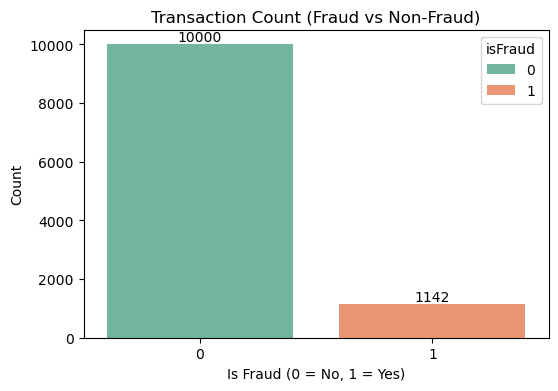

In [48]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x="isFraud", data=data, palette='Set2', hue='isFraud')

plt.title("Transaction Count (Fraud vs Non-Fraud)")
plt.xlabel("Is Fraud (0 = No, 1 = Yes)")
plt.ylabel("Count")

# Add counts on top of each bar
for bars in ax.containers:
    ax.bar_label(bars, fmt='%d')

plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #f9ebea; font-size:115%; text-align:left"> <h3 align="left"><font color=green>🔍 Insights</font></h3> <ul> <li><b>Transaction breakdown:</b> Most transactions are <b>non-fraudulent (10,000)</b>, while only <b>1,142</b> are fraudulent.</li> <li><b>Class imbalance:</b> The dataset is <b>highly imbalanced</b>, which can cause models to favor the majority (non-fraud) class.</li> <li><b>Modeling implication:</b> Use techniques to handle imbalance — <i>resampling</i> (SMOTE, undersampling), <i>class weights</i>, and <i>evaluation with precision/recall or AUC</i> rather than accuracy — to improve fraud detection performance.</li> </ul> </div>

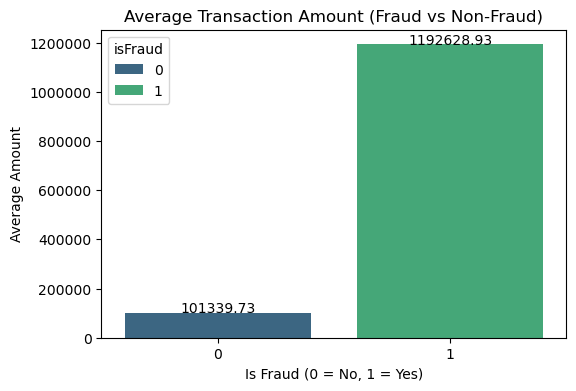

In [49]:
avg_amount = data.groupby('isFraud')['amount'].mean().reset_index()

plt.figure(figsize=(6,4))
ax = sns.barplot(x='isFraud', y='amount', data=avg_amount, palette='viridis', hue="isFraud")

plt.title("Average Transaction Amount (Fraud vs Non-Fraud)")
plt.xlabel("Is Fraud (0 = No, 1 = Yes)")
plt.ylabel("Average Amount")
plt.ticklabel_format(style='plain', axis='y')


# Add values on top of bars
for i, val in enumerate(avg_amount['amount']):
    plt.text(i, val + 5, f"{val:.2f}", ha='center')

plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #f9ebea; font-size:115%; text-align:left">

<h3 align="left"><font color=green>🔍 Insights</font></h3>

<ul>
  <li>The <b>average amount</b> of <b>fraudulent transactions (~1.19M)</b> is significantly <b>higher</b> than that of <b>non-fraudulent transactions (~0.10M)</b>.</li>
  <li>This indicates that <b>fraud cases typically involve large transaction amounts</b>, making <b>high-value transfers</b> more likely to be suspicious.</li>
</ul>

</div>


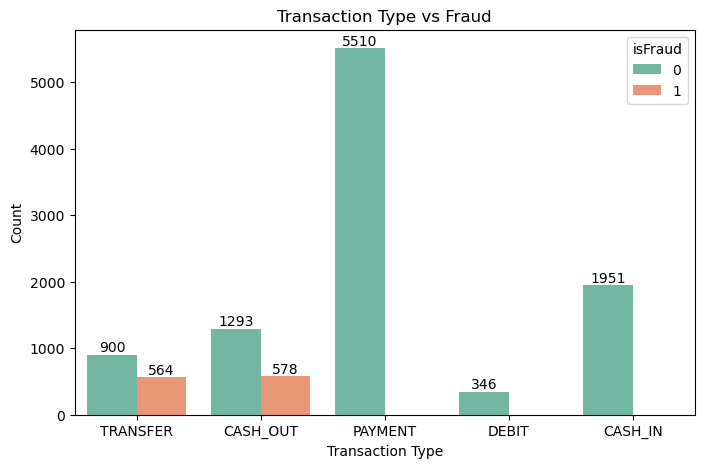

In [50]:
plt.figure(figsize=(8,5))
ax = sns.countplot(x='type', data=data, hue='isFraud', palette='Set2')
plt.title("Transaction Type vs Fraud")
plt.xlabel("Transaction Type")
plt.ylabel("Count")

#Add counts on top of each bar
for bars in ax.containers:
    ax.bar_label(bars, fmt='%d')

plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #f9ebea; font-size:115%; text-align:left">

<h3 align="left"><font color=green>🔍 Insights</font></h3>

<ul>
  <li><b>TRANSFER</b> and <b>CASH_OUT</b> transaction types record the <b>highest number of fraud cases</b>.</li>
  <li><b>PAYMENT</b> transactions are the <b>most frequent</b> but show <b>very few instances of fraud</b>.</li>
  <li><b>CASH_IN</b> and <b>DEBIT</b> transactions are <b>mostly safe</b>, with <b>negligible fraudulent activity</b>.</li>
</ul>

</div>


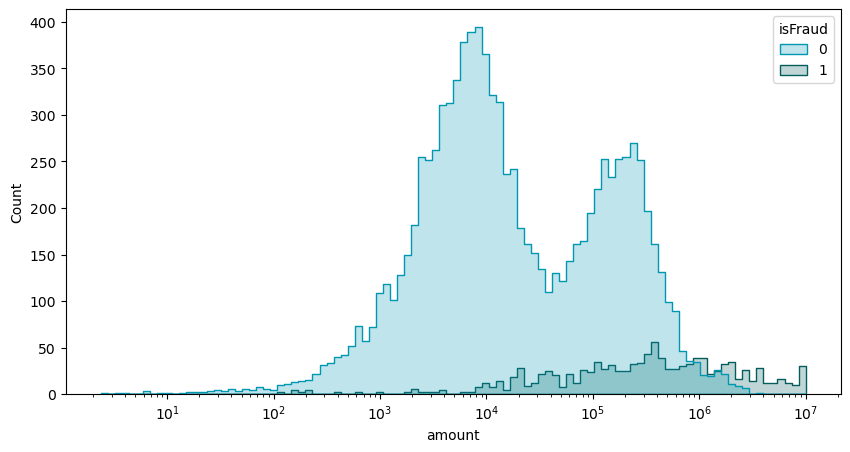

In [67]:
plt.figure(figsize=(10,5))
sns.histplot(data=data, x="amount", hue="isFraud", bins=100, log_scale=True, element="step" , palette=["#0097B2","#055C5C"])
plt.show()

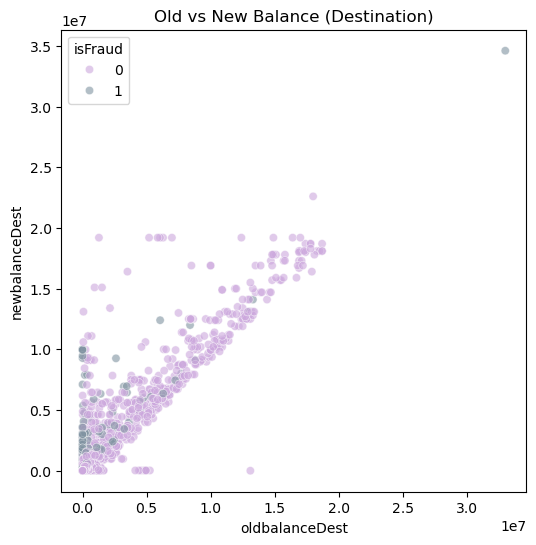

In [68]:
plt.figure(figsize=(6,6))
sns.scatterplot(data=data.sample(5000),x="oldbalanceDest", y="newbalanceDest", hue="isFraud", alpha=0.6, palette=["#CCA8DD","#8093A1"])
plt.title("Old vs New Balance (Destination)")
plt.show()

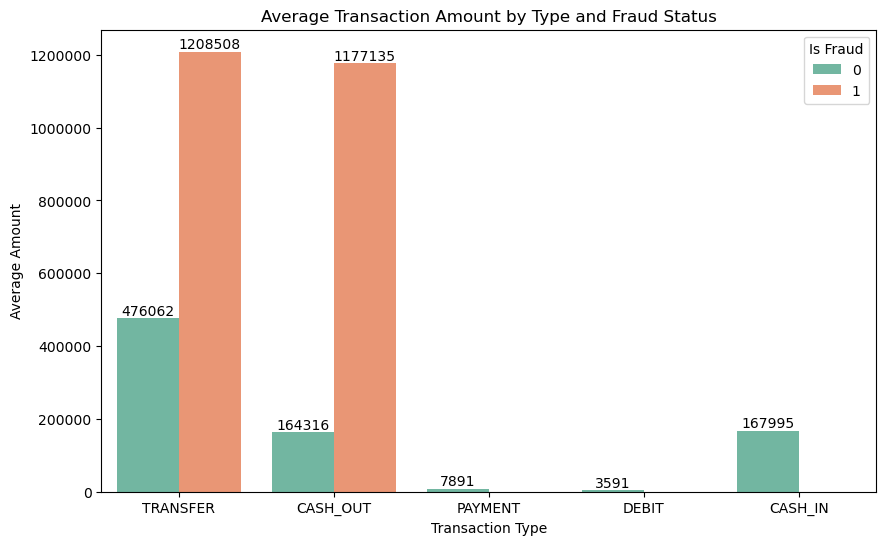

In [51]:
plt.figure(figsize=(10,6))
ax = sns.barplot(data=data, x='type', y='amount', hue='isFraud', errorbar=None, palette='Set2')

plt.title("Average Transaction Amount by Type and Fraud Status")
plt.xlabel("Transaction Type")
plt.ylabel("Average Amount")
plt.ticklabel_format(style='plain', axis='y')
plt.legend(title="Is Fraud")

# Add values on top of bars
for bars in ax.containers:
    ax.bar_label(bars, fmt='%.0f')

plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #f9ebea; font-size:115%; text-align:left">

<h3 align="left"><font color=green>🔍 Insights</font></h3>

<ul>
  <li><b>Fraudulent transactions</b> occur primarily in <b>TRANSFER</b> and <b>CASH_OUT</b> types, which have <b>very high average transaction amounts</b>.</li>
  <li><b>Non-fraud transactions</b> are generally of <b>lower value</b> across all transaction types.</li>
  <li><b>PAYMENT</b>, <b>DEBIT</b>, and <b>CASH_IN</b> show almost <b>no fraudulent activity</b>, indicating these transaction types are relatively <b>safe and low-risk</b>.</li>
</ul>

</div>


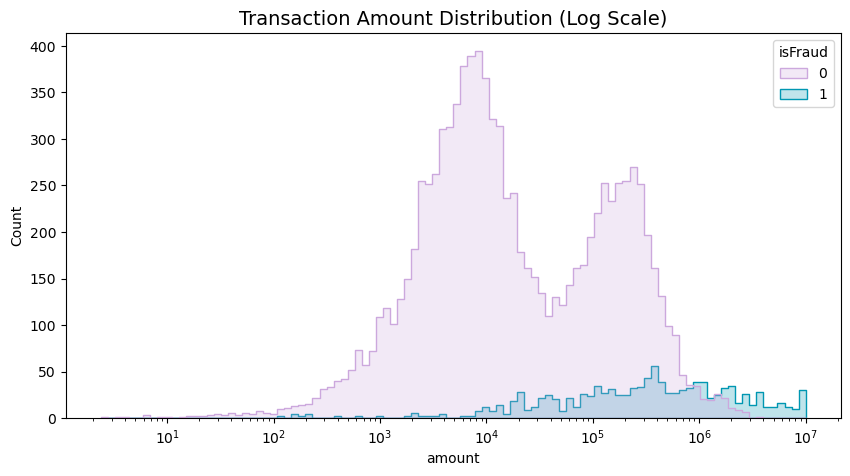

In [69]:
plt.figure(figsize=(10,5))

sns.histplot(data=data,x="amount",hue="isFraud",bins=100,log_scale=True,element="step",palette=["#CCA8DD", "#0097B2"])
plt.title("Transaction Amount Distribution (Log Scale)", fontsize=14)
plt.show()

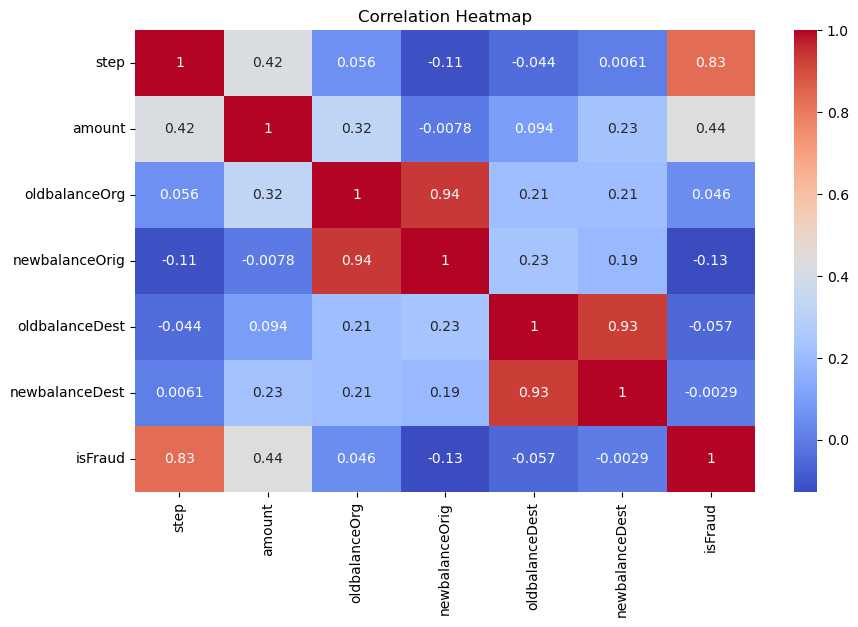

In [52]:
plt.figure(figsize=(10,6))
sns.heatmap(data.select_dtypes(include=[np.number]).corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #f9ebea; font-size:115%; text-align:left">

<h3 align="left"><font color=green>🔍 Insights</font></h3>

<ul>
  <li><b><code>step</code></b> shows a strong positive correlation (<b>0.83</b>) with <b><code>isFraud</code></b>, indicating that frauds may occur more frequently at specific time steps.</li>
  <li><b><code>amount</code></b> has a moderate correlation (<b>0.44</b>) with <b><code>isFraud</code></b>, suggesting that higher transaction amounts are more likely to be fraudulent.</li>
  <li><b><code>oldbalanceOrg</code></b> and <b><code>newbalanceOrig</code></b> are highly correlated (<b>0.94</b>), showing that these balances move together during most transactions.</li>
  <li><b><code>oldbalanceDest</code></b> and <b><code>newbalanceDest</code></b> also show a strong correlation (<b>0.93</b>), meaning the destination account balances update consistently.</li>
  <li>Overall, <b>transaction timing</b> and <b>transaction amount</b> emerge as key indicators in identifying potential fraudulent activity.</li>
</ul>

</div>


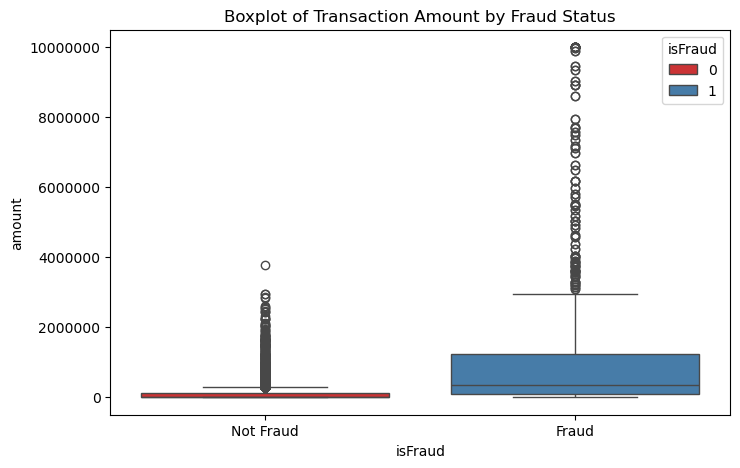

In [53]:
# Boxplot for transaction amount
plt.figure(figsize=(8,5))
sns.boxplot(x="isFraud", y="amount", data=data, palette="Set1",hue='isFraud')
plt.title("Boxplot of Transaction Amount by Fraud Status")
plt.xticks([0,1], ['Not Fraud','Fraud'])
plt.ticklabel_format(style='plain', axis='y')
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #f9ebea; font-size:115%; text-align:left">

<h3 align="left"><font color=green>🔍 Insights</font></h3>

<ul>
  <li><b>Fraudulent transactions</b> generally involve <b>higher transaction amounts</b> compared to non-fraudulent ones.</li>
  <li>There are <b>many outliers</b> in fraud cases, indicating a few transactions with <b>extremely large values</b>.</li>
  <li><b>Non-fraud transactions</b> mostly occur with <b>smaller amounts</b>, suggesting that <b>large money transfers</b> are more often linked to fraudulent activity.</li>
</ul>

</div>


In [70]:
# Outlier Values
Q1 = data["amount"].quantile(0.25)
Q3 = data["amount"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

outliers = data[(data["amount"] < lower_bound) | (data["amount"] > upper_bound)]
print("Number of Outliers in Amount:", outliers.shape[0])
outliers.head(10)

Number of Outliers in Amount: 1172


,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
6,1,1,416001.33,0.00,0.00,102.00,9291619.62,1
7,1,4,1277212.77,1277212.77,0.00,0.00,0.00,1
8,1,1,1277212.77,1277212.77,0.00,0.00,2444985.19,1
16,2,4,1096187.24,1096187.24,0.00,0.00,0.00,1
17,2,1,1096187.24,1096187.24,0.00,0.00,1096187.24,1
18,2,4,963532.14,963532.14,0.00,0.00,0.00,1
19,2,1,963532.14,963532.14,0.00,132382.57,1095914.71,1
28,4,4,10000000.00,12900000.00,2930418.44,0.00,0.00,1
29,4,1,10000000.00,10000000.00,0.00,0.00,9941904.21,1
30,4,4,2930418.44,2930418.44,0.00,0.00,0.00,1


<div style="border-radius:7px; padding: 10px; background-color: #E3FCF9; ">
<b style="color:#0b5345;font-size:130% ;">FEATURE ENGINEERING</b>

In [55]:
data = data.drop(['nameOrig','nameDest'],axis=1)

In [56]:
data.head(10)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,TRANSFER,181.00,181.00,0.0,0.0,0.00,1
1,1,CASH_OUT,181.00,181.00,0.0,21182.0,0.00,1
2,1,TRANSFER,2806.00,2806.00,0.0,0.0,0.00,1
3,1,CASH_OUT,2806.00,2806.00,0.0,26202.0,0.00,1
4,1,TRANSFER,20128.00,20128.00,0.0,0.0,0.00,1
5,1,CASH_OUT,20128.00,20128.00,0.0,6268.0,12145.85,1
6,1,CASH_OUT,416001.33,0.00,0.0,102.0,9291619.62,1
7,1,TRANSFER,1277212.77,1277212.77,0.0,0.0,0.00,1
8,1,CASH_OUT,1277212.77,1277212.77,0.0,0.0,2444985.19,1
9,1,TRANSFER,35063.63,35063.63,0.0,0.0,0.00,1


In [57]:
le=LabelEncoder()
data['type']= le.fit_transform(data['type'])

In [58]:
X= data.drop('isFraud', axis=1)
y= data['isFraud']

In [59]:
scaler= StandardScaler()
X = scaler.fit_transform(X)

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("=== DATA SPLIT ===")
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")
print(f"Fraud rate in training: {y_train.mean():.4f}")
print(f"Fraud rate in testing: {y_test.mean():.4f}")

=== DATA SPLIT ===
Training set shape: (8913, 7)
Testing set shape: (2229, 7)
Fraud rate in training: 0.1025
Fraud rate in testing: 0.1023


<div style="border-radius:7px; padding: 10px; background-color: #E3FCF9; ">
<b style="color:#0b5345;font-size:130% ;">MODEL SELECTION</b>

In [61]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42, n_estimators=100),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": xgb.XGBClassifier(eval_metric='logloss', random_state=42)
}

results = {}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    Accuracy = accuracy_score(y_test, y_pred)
    Precision = precision_score(y_test, y_pred)
    Recall = recall_score(y_test, y_pred)
    F1_Score = f1_score(y_test, y_pred)
    Roc_Auc = roc_auc_score(y_test, y_prob)

    # Save all metrics
    results[name] = {
        "Accuracy": Accuracy,
        "Precision": Precision,
        "Recall": Recall,
        "F1-Score": F1_Score,
        "ROC-AUC": Roc_Auc
    }

    print(f"\n📄 Classification Report: {name}")
    print(classification_report(y_test, y_pred, target_names=['Not Fraud', 'Fraud']))

# Convert results to DataFrame
results_df = pd.DataFrame(results).T
print("\n🔹 Model Performance Comparison:\n", results_df.round(4))

# Calculate average score across all metrics
results_df["Overall_Score"] = results_df.mean(axis=1)

# Identify the best model based on highest overall average score
best_model_name = results_df["Overall_Score"].idxmax()
best_model = models[best_model_name]

print(f"\n🏆 Best Overall Model: {best_model_name}")
print(results_df.loc[best_model_name])

# Final Predictions using the best model
final_predictions = best_model.predict(X_test)
final_predictions_train=best_model.predict(X_train)
final_probabilities = best_model.predict_proba(X_test)[:, 1]

# Display classification report for the best model
print(f"\n📊 Final Best Model ({best_model_name}) Performance:")
print(classification_report(y_test, final_predictions, target_names=['Not Fraud', 'Fraud']))

# Model Performance
train_accuracy = accuracy_score(y_train, final_predictions_train)
test_accuracy = accuracy_score(y_test, final_predictions)
print(f"Training Accuracy={train_accuracy:.2f}")
print(f"Testing Accuracy={test_accuracy:.2f}")


📄 Classification Report: Logistic Regression
              precision    recall  f1-score   support

   Not Fraud       0.99      1.00      0.99      2001
       Fraud       0.99      0.87      0.93       228

    accuracy                           0.99      2229
   macro avg       0.99      0.93      0.96      2229
weighted avg       0.99      0.99      0.99      2229


📄 Classification Report: Decision Tree
              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00      2001
       Fraud       0.99      0.97      0.98       228

    accuracy                           1.00      2229
   macro avg       0.99      0.99      0.99      2229
weighted avg       1.00      1.00      1.00      2229


📄 Classification Report: Random Forest
              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00      2001
       Fraud       1.00      0.96      0.98       228

    accuracy                           1.00      2229
  

<div style="border-radius:10px; padding:15px; background-color:#f0f4f8; font-size:115%;">

<h3 style="color:green;">📊 Model Performance Comparison Insights</h3>

<ul>
  <li>All models perform very well, with <b>accuracy above 98%</b>.</li>
  <li><b>Logistic Regression</b> has high precision (0.995) but lower recall (0.868), missing some fraud cases.</li>
  <li><b>Tree-based models</b> (Decision Tree, Random Forest, Gradient Boosting, XGBoost) achieve both high precision and recall, detecting almost all frauds.</li>
  <li><b>XGBoost</b> is the best performer overall with <b>accuracy 99.8%</b>, <b>F1-score 0.991</b>, and <b>ROC-AUC 0.9999</b>, making it highly reliable for fraud detection.</li>
</ul>

<p><b>Summary:</b> Tree-based models outperform Logistic Regression, with XGBoost being the most effective for detecting fraud while minimizing false positives.</p>

</div>


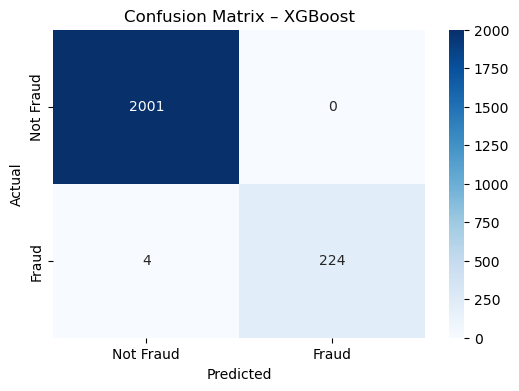

In [62]:
# Confusion Matrix
cm = confusion_matrix(y_test, final_predictions)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix – XGBoost')
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #f9ebea; font-size:115%; text-align:left">

<h3 align="left"><font color=teal>🔍 Insights</font></h3>

<ul>
  <li>The model accurately predicted <b>2001 non-fraud</b> and <b>224 fraud</b> transactions.</li>
  <li>Only <b>4 fraud cases</b> were missed (<b>False Negatives</b>), and there were <b>no False Positives</b>.</li>
  <li>This demonstrates that <b>XGBoost</b> achieved <b>exceptional accuracy</b> and <b>outstanding fraud detection capability</b>, making it the <b>best-performing model</b> overall.</li>
</ul>

</div>


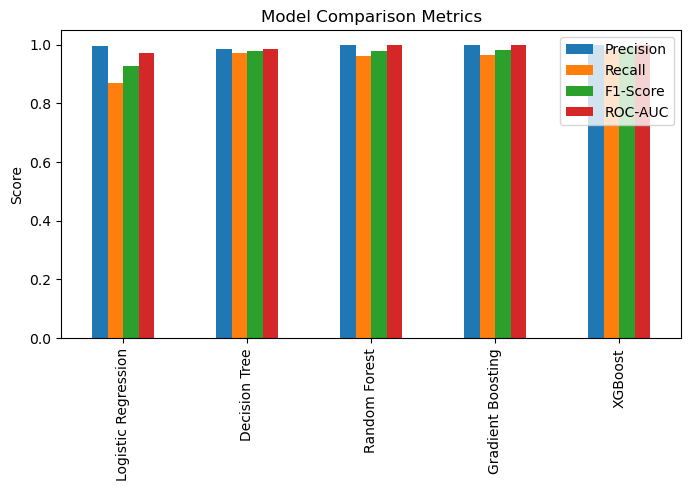

In [63]:
results_df[["Precision","Recall","F1-Score","ROC-AUC"]].plot(kind="bar", figsize=(8,4))
plt.title("Model Comparison Metrics")
plt.ylabel("Score")
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #f9ebea; font-size:115%; text-align:left">

<h3 align="left"><font color=darkcyan>🔍 Insights</font></h3>

<ul>
  <li>All models perform well, achieving <b>high Precision, Recall, F1-Score, and ROC-AUC</b> values.</li>
  <li><b>Gradient Boosting</b> and <b>XGBoost</b> slightly outperform others, providing the <b>best overall balance</b> across all metrics.</li>
  <li><b>Logistic Regression</b> remains a <b>simple yet effective model</b> with strong performance.</li>
  <li>Ensemble models (<b>Random Forest, Gradient Boosting, XGBoost</b>) demonstrate <b>excellent generalization</b> and reliability for fraud detection.</li>
</ul>

</div>


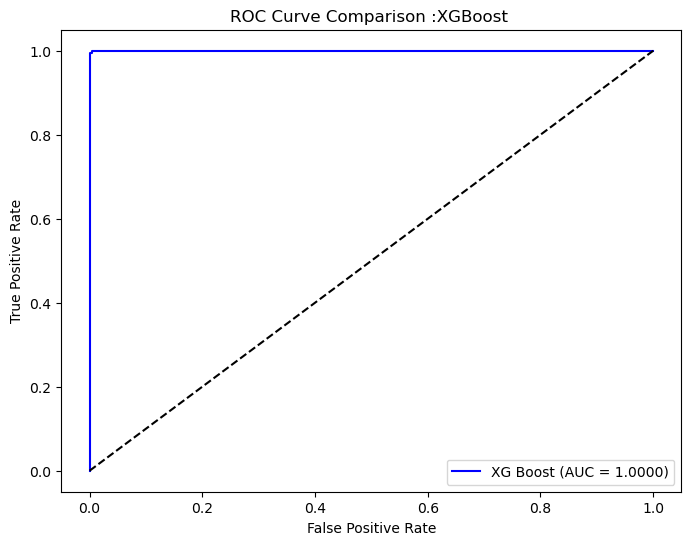

In [64]:
# ROC Curve
plt.figure(figsize=(8,6))
y_prob = best_model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)
plt.plot(fpr, tpr, color='blue', label=f"XG Boost (AUC = {auc_score:.4f})")
plt.plot([0,1],[0,1],'k--')
plt.title("ROC Curve Comparison :XGBoost ")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #f9ebea; font-size:115%; text-align:left">

<h3 align="left"><font color=teal>🔍 Insights</font></h3>

<ul>
  <li>The <b>AUC score of 0.97</b> indicates that the <b>Logistic Regression model</b> performs exceptionally well in distinguishing between <b>fraudulent</b> and <b>non-fraudulent</b> transactions.</li>
  <li>The ROC curve remains close to the <b>top-left corner</b>, reflecting a <b>high true positive rate</b> and a <b>low false positive rate</b>.</li>
  <li>Overall, the model exhibits <b>excellent classification capability</b> and strong predictive power for fraud detection.</li>
</ul>

</div>


<div style="border-radius:7px; padding: 10px; background-color: #E3FCF9; ">
<b style="color:#0b5345;font-size:130% ;">FINANCIAL IMPACT ANALYSIS</b>


💰 Financial Impact Analysis (XGBoost):
Prevented Loss (TP): $ 1120000
Missed Loss (FN): $ 20000
Investigation Cost (FP): $ 0
Net Profit Impact: $ 1100000


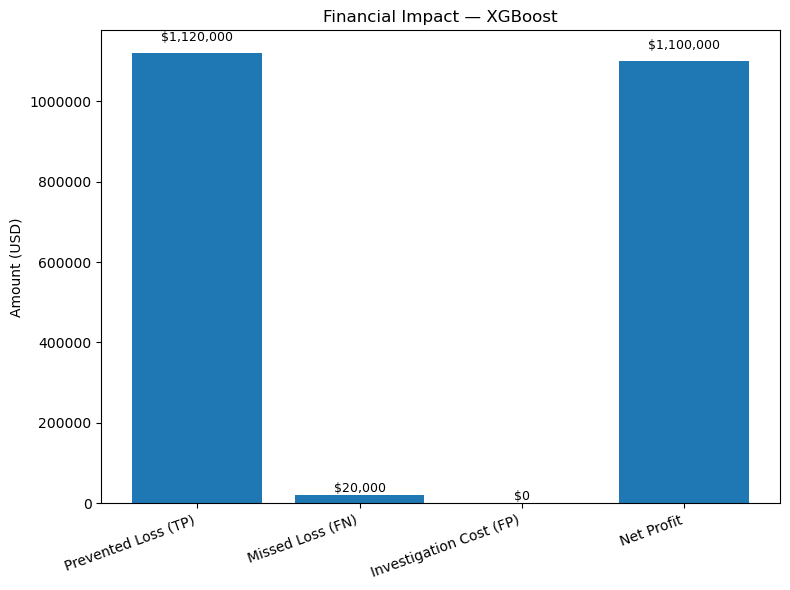

In [65]:
# Assume each fraud costs $5000 loss
fraud_loss = 5000  

# Confusion Matrix for Best Model (choose XGBoost)
best_model = models["XGBoost"]
y_pred_best = best_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred_best)
tn, fp, fn, tp = cm.ravel()

# Financial metrics
prevented_loss = tp * fraud_loss
missed_loss = fn * fraud_loss
false_alert_cost = fp * 100  # assume $100 investigation cost

profit = prevented_loss - (missed_loss + false_alert_cost)

print("\n💰 Financial Impact Analysis (XGBoost):")
print("Prevented Loss (TP): $", prevented_loss)
print("Missed Loss (FN): $", missed_loss)
print("Investigation Cost (FP): $", false_alert_cost)
print("Net Profit Impact: $", profit)

labels = ["Prevented Loss (TP)", "Missed Loss (FN)", "Investigation Cost (FP)", "Net Profit"]
values = [prevented_loss, missed_loss, false_alert_cost, profit]
plt.figure(figsize=(8,6))
bars = plt.bar(labels, values)
plt.title("Financial Impact — XGBoost")
plt.ylabel("Amount (USD)")
plt.xticks(rotation=20, ha="right")
plt.ticklabel_format(style='plain', axis='y')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + (yval * 0.02),  # slight offset above bar
             f"${yval:,.0f}", ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


<div style="border-radius:15px; padding:20px; background-color:#fefaf0; font-size:115%; max-width:700px;">

<h3 style="color:#e65100; text-align:center;">💰 Financial Impact Dashboard (XGBoost)</h3>

<p style="text-align:center;">Summary of fraud detection performance and its direct financial impact.</p>

<div style="display:flex; justify-content:space-between; flex-wrap:wrap; margin-top:20px; gap:10px;">

  <div style="flex:1; min-width:150px; background-color:#c8e6c9; padding:15px; border-radius:10px; text-align:center;">
    <h4 style="margin:5px;">Prevented Loss</h4>
    <p style="font-size:18px; font-weight:bold;">$1,120,000</p>
    <p style="font-size:12px;">Fraud correctly detected and prevented</p>
  </div>

  <div style="flex:1; min-width:150px; background-color:#ffccbc; padding:15px; border-radius:10px; text-align:center;">
    <h4 style="margin:5px;">Missed Loss</h4>
    <p style="font-size:18px; font-weight:bold;">$20,000</p>
    <p style="font-size:12px;">Fraud not detected</p>
  </div>

  <div style="flex:1; min-width:150px; background-color:#b3e5fc; padding:15px; border-radius:10px; text-align:center;">
    <h4 style="margin:5px;">Investigation Cost</h4>
    <p style="font-size:18px; font-weight:bold;">$0</p>
    <p style="font-size:12px;">Cost of false alarms</p>
  </div>

  <div style="flex:1; min-width:150px; background-color:#ffe082; padding:15px; border-radius:10px; text-align:center;">
    <h4 style="margin:5px;">Net Profit Impact</h4>
    <p style="font-size:18px; font-weight:bold;">$1,100,000</p>
    <p style="font-size:12px;">Overall financial gain</p>
  </div>

</div>

<div style="margin-top:20px; background-color:#fff3e0; padding:15px; border-radius:10px;">
<h4 style="color:#e65100;">Key Insights:</h4>
<ul>
  <li>High prevented loss shows the model effectively detects real frauds.</li>
  <li>Low missed loss and zero investigation cost maintain operational efficiency.</li>
  <li>Provides a clear monetary justification for deploying machine learning in fraud detection.</li>
  <li>Balances fraud detection with minimal impact on legitimate transactions.</li>
</ul>
<p><b>Conclusion:</b> XGBoost delivers substantial financial savings while efficiently identifying fraudulent transactions, making it highly valuable for business operations.</p>
</div>

</div>


## Saving the best model and Deploying it

In [66]:
joblib.dump(best_model, "xgb_fraud_model.pkl")
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

<div style="border-radius:10px; padding: 15px; background-color: #f0f8ff; font-size:115%; text-align:left">

<h3 align="left"><font color=teal>🚀 Final Report</font></h3>

<ul>
  <li>The <b>XGBoost model</b> was selected as the <b>best-performing model</b> for fraud detection after evaluating multiple metrics including accuracy, recall, F1-score, and ROC-AUC</li>
  <li>The model was <b>trained and saved</b> using <code>joblib</code>, enabling future predictions without retraining</li>
  <li>It has been <b>deployed via Streamlit</b>, allowing real-time fraud prediction based on transaction inputs</li>
  <li>Evaluation results confirm that the model effectively identifies fraudulent transactions with <b>high precision and recall</b></li>
</ul>

<p style="font-weight:bold; color:green; text-align:center;">✅ Model is saved and deployed successfully</p>

</div>
